In [280]:
import json
from collections import Counter

from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import cv2

In [62]:
with open('mcr_songs_clean.json') as json_file:
    mcr_songs = json.load(json_file)

## Bullets

In [63]:
bullets = mcr_songs['I Brought You My Bullets, You Brought Me Your Love']['songs']

In [64]:
bullets_lyrics = ''
for song in bullets:
    bullets_lyrics += song['lyrics']

In [65]:
c = Counter(bullets_lyrics.split())
sr = pd.Series(c)
sr.sort_values(ascending= False)

i           166
and         162
you         113
the          91
we           79
           ... 
struck        1
prime         1
floor         1
innocent      1
meet          1
Length: 599, dtype: int64

In [124]:
bullet_mask = cv2.imread('bullet_img.png')
bullet_mask = cv2.cvtColor(bullet_mask, cv2.COLOR_BGR2GRAY)
np.unique(bullet_mask)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [125]:
def transform_format(val):
    if val > 100:
        return 255
    else:
        return 0

In [126]:
transformed_bullet_mask = np.ndarray((bullet_mask.shape[0],bullet_mask.shape[1]), np.int32)

for i in range(len(bullet_mask)):
    transformed_bullet_mask[i] = list(map(transform_format, bullet_mask[i]))

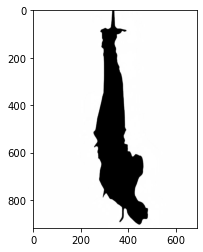

In [127]:
plt.imshow(bullet_mask,'gray')

In [128]:
f = open('stopwords.txt', 'r')
stopwords = f.read().split()

In [154]:
wcloud = WordCloud(collocations=False,stopwords=stopwords,
                   mask=transformed_bullet_mask,background_color='whitesmoke',
                   colormap='bone',max_words=300).generate(bullets_lyrics)

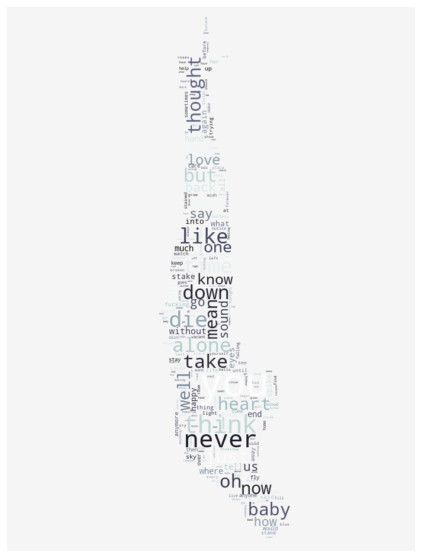

In [155]:
plt.figure(figsize=(10,10))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [153]:
wcloud.to_file('bullet_wc_hear.png')

## Black Parade

In [156]:
bullets = mcr_songs['The Black Parade']['songs']

In [157]:
bullets_lyrics = ''
for song in bullets:
    bullets_lyrics += song['lyrics']

In [158]:
c = Counter(bullets_lyrics.split())
sr = pd.Series(c)
sr.sort_values(ascending= False)

i           278
you         273
and         185
the         177
to          125
           ... 
ohhhwhen      1
ball          1
tomorrow      1
raise         1
repose        1
Length: 793, dtype: int64

In [211]:
black_mask = cv2.imread('black_img.png')
black_mask = cv2.cvtColor(black_mask, cv2.COLOR_BGR2GRAY)
black_mask = cv2.flip(black_mask, 1)
np.unique(black_mask)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [212]:
def transform_format(val):
    if val > 50:
        return 255
    else:
        return 0

In [213]:
transformed_black_mask = np.ndarray((black_mask.shape[0],black_mask.shape[1]), np.int32)

for i in range(len(black_mask)):
    transformed_black_mask[i] = list(map(transform_format, black_mask[i]))

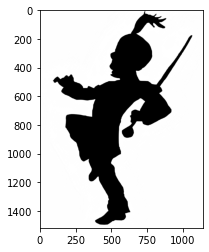

In [214]:
plt.imshow(black_mask,'gray')

In [221]:
f = open('stopwords.txt', 'r')
stopwords = f.read().split()

In [241]:
wcloud = WordCloud(collocations=False,stopwords=stopwords,
                   background_color='whitesmoke',
                   mask=transformed_black_mask,
                   colormap='gray',max_words=400).generate(bullets_lyrics)

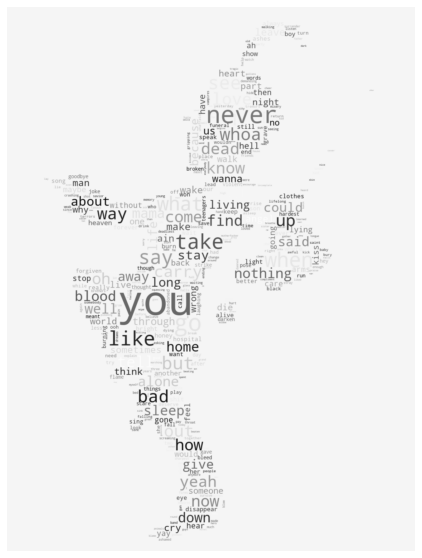

In [242]:
plt.figure(figsize=(10,10))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [243]:
wcloud.to_file('black_wc_gray.png')

## Danger Days

In [245]:
danger = mcr_songs['Danger Days: The True Lives Of The Fabulous Killjoys']['songs']

In [246]:
danger_lyrics = ''
for song in danger:
    danger_lyrics += song['lyrics']

In [247]:
c = Counter(danger_lyrics.split())
sr = pd.Series(c)
sr.sort_values(ascending= False)

the              340
na               240
you              238
i                141
we               134
                ... 
built              1
bombs              1
ash                1
fell               1
extermination      1
Length: 908, dtype: int64

In [248]:
danger_mask = cv2.imread('danger_img.png')
danger_mask = cv2.cvtColor(danger_mask, cv2.COLOR_BGR2GRAY)
np.unique(danger_mask)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [249]:
def transform_format(val):
    if val > 50:
        return 255
    else:
        return 0

In [250]:
transformed_danger_mask = np.ndarray((danger_mask.shape[0],danger_mask.shape[1]), np.int32)

for i in range(len(danger_mask)):
    transformed_danger_mask[i] = list(map(transform_format, danger_mask[i]))

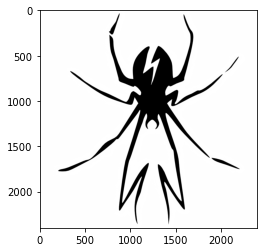

In [251]:
plt.imshow(danger_mask,'gray')

In [252]:
f = open('stopwords.txt', 'r')
stopwords = f.read().split()

In [263]:
wcloud = WordCloud(collocations=False,stopwords=stopwords,
                   background_color='whitesmoke',
                   mask=transformed_danger_mask,
                   colormap='CMRmap',max_words=400).generate(bullets_lyrics)

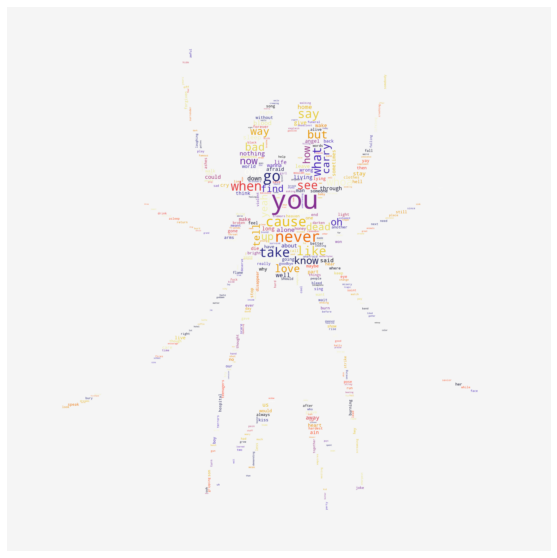

In [264]:
plt.figure(figsize=(10,10))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [265]:
wcloud.to_file('danger_wc_cmr.png')

## SWS

In [292]:
sws = mcr_songs['Danger Days: The True Lives Of The Fabulous Killjoys']['songs']

In [293]:
sws_lyrics = ''
for song in sws:
    sws_lyrics += song['lyrics']

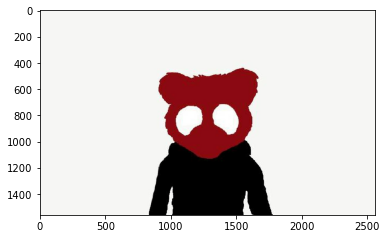

In [301]:
sws_mask = cv2.imread('sws.jpeg')
sws_mask = cv2.cvtColor(sws_mask, cv2.COLOR_BGR2RGB)
# np.unique(sws_mask)
plt.imshow(sws_mask)

In [304]:
wcloud = WordCloud(collocations=False,stopwords=stopwords,
                   background_color='whitesmoke',
                   mask=sws_mask,
                   colormap='gray',max_words=400,
#                    max_font_size=60
                  ).generate(sws_lyrics)

(-0.5, 2555.5, 1559.5, -0.5)

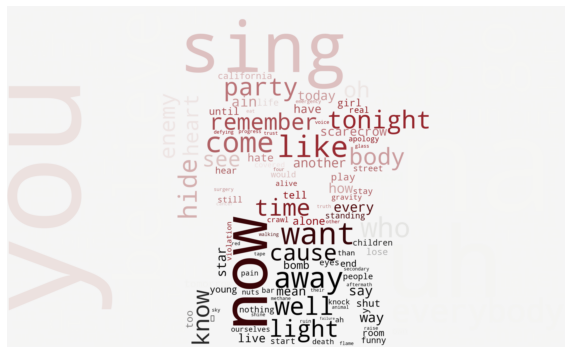

In [305]:
image_colors = ImageColorGenerator(sws_mask)
plt.figure(figsize=[10,10])
plt.imshow(wcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")